## Import necessary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## Import Dataset 

In [2]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [4]:
dataset.tail(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Getting the detailed information about the Database

In [5]:
dataset.shape

(768, 9)

In [6]:
diabetes_true_count = len(dataset.loc[dataset['Outcome'] == 1])
diabetes_false_count = len(dataset.loc[dataset['Outcome'] == 0])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
dataset.corr()  ## Show the pairwise correlation of all columns in the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


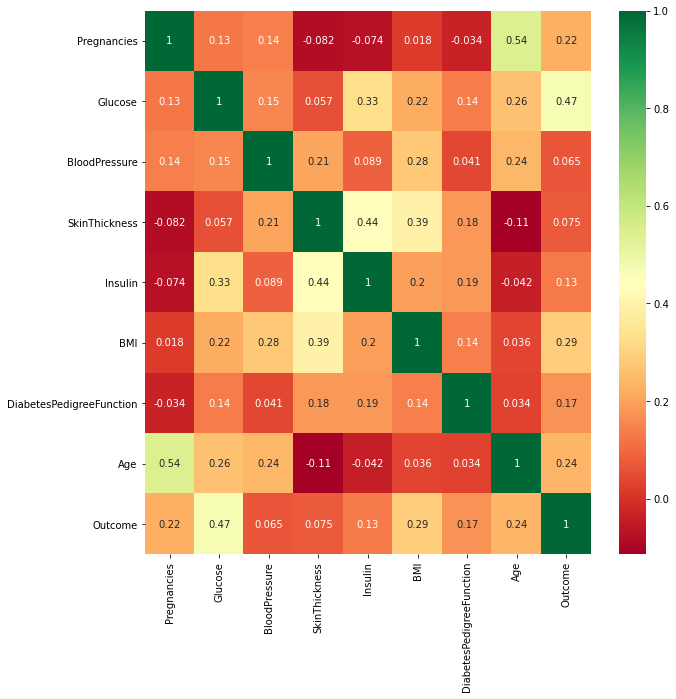

In [9]:
# Get correlations of each features in dataset and plot into a heat map
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Data Visualization

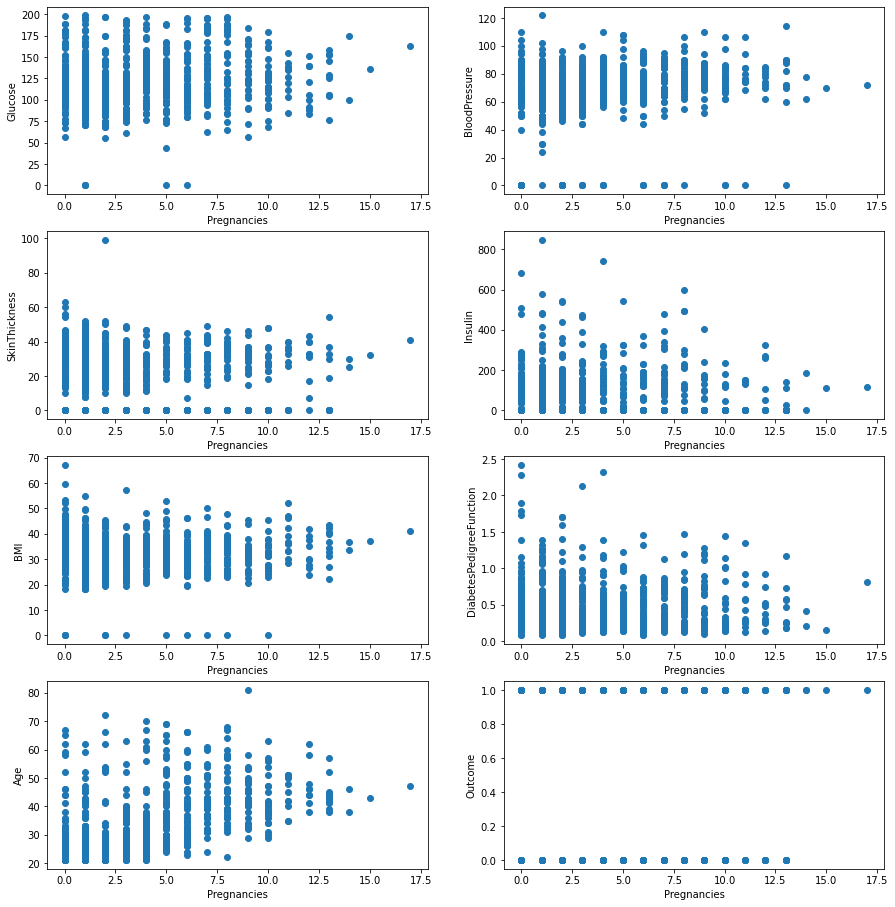

In [10]:
plt.figure(figsize=(15, 20))
j=1
for i in range(1,9):
        plt.subplot(5,2,i)
        plt.scatter(dataset.iloc[:,0],dataset.iloc[:,i])
        plt.xlabel(dataset.columns[0])
        plt.ylabel(dataset.columns[i])
        j+=1

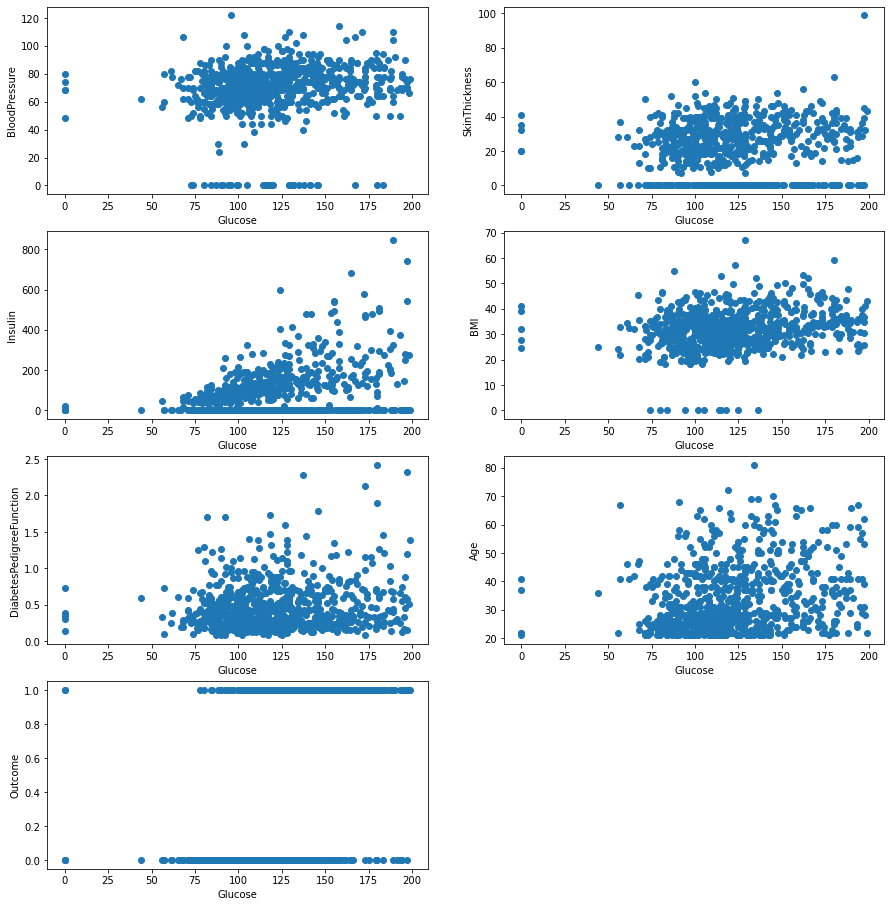

In [11]:
plt.figure(figsize=(15, 20))
j=1
for i in range(2,9):
        plt.subplot(5,2,j)
        plt.scatter(dataset.iloc[:,1],dataset.iloc[:,i])
        plt.xlabel(dataset.columns[1])
        plt.ylabel(dataset.columns[i])
        j+=1

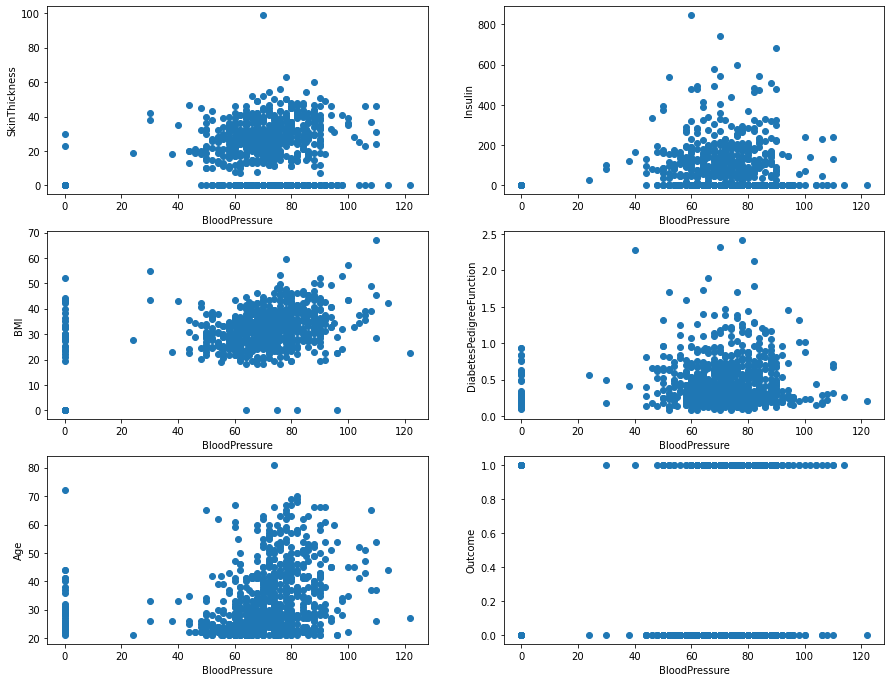

In [12]:
plt.figure(figsize=(15, 20))
j=1
for i in range(3,9):
        plt.subplot(5,2,j)
        plt.scatter(dataset.iloc[:,2],dataset.iloc[:,i])
        plt.xlabel(dataset.columns[2])
        plt.ylabel(dataset.columns[i])
        j+=1

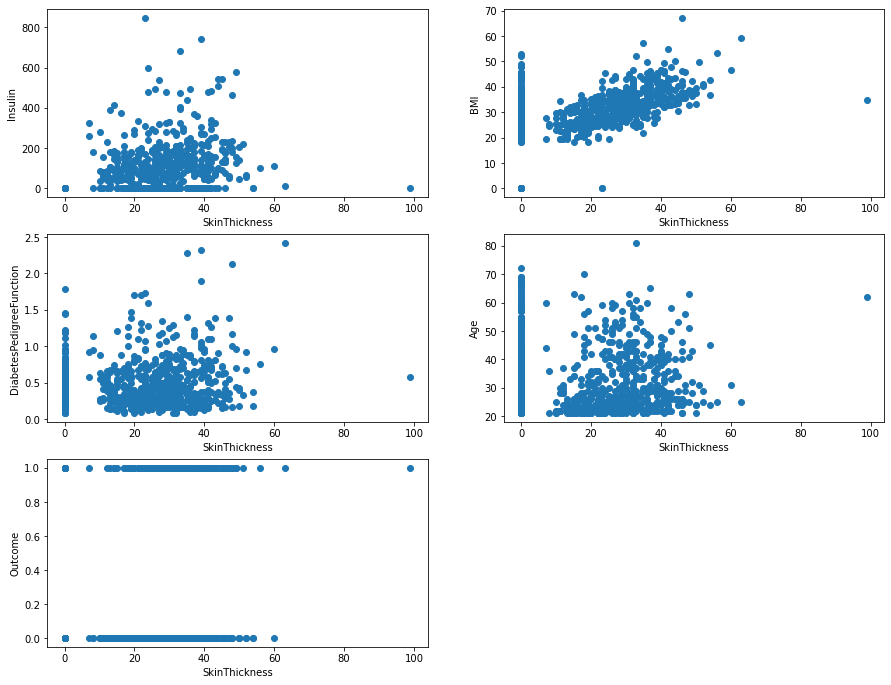

In [13]:
plt.figure(figsize=(15, 20))
j=1
for i in range(4,9):
        plt.subplot(5,2,j)
        plt.scatter(dataset.iloc[:,3],dataset.iloc[:,i])
        plt.xlabel(dataset.columns[3])
        plt.ylabel(dataset.columns[i])
        j+=1

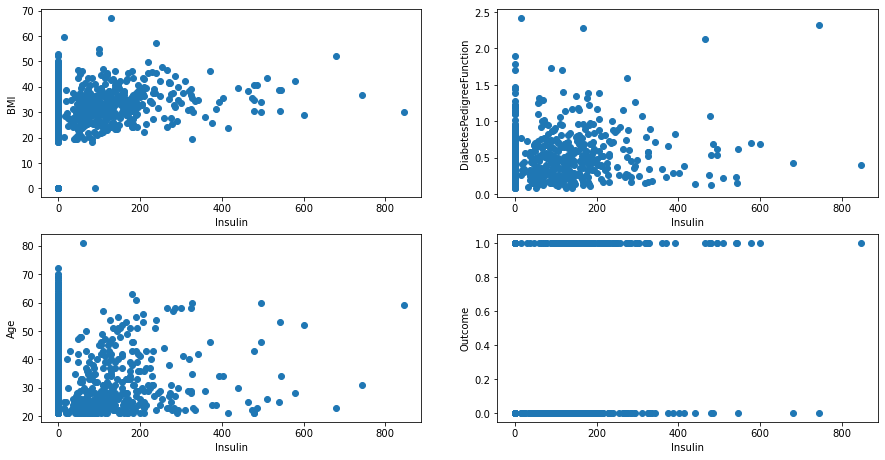

In [14]:
plt.figure(figsize=(15, 20))
j=1
for i in range(5,9):
        plt.subplot(5,2,j)
        plt.scatter(dataset.iloc[:,4],dataset.iloc[:,i])
        plt.xlabel(dataset.columns[4])
        plt.ylabel(dataset.columns[i])
        j+=1

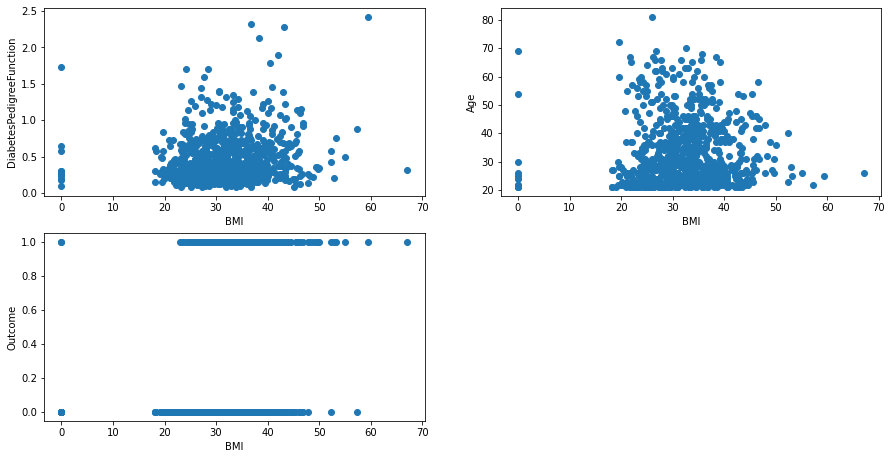

In [15]:
plt.figure(figsize=(15, 20))
j=1
for i in range(6,9):
        plt.subplot(5,2,j)
        plt.scatter(dataset.iloc[:,5],dataset.iloc[:,i])
        plt.xlabel(dataset.columns[5])
        plt.ylabel(dataset.columns[i])
        j+=1

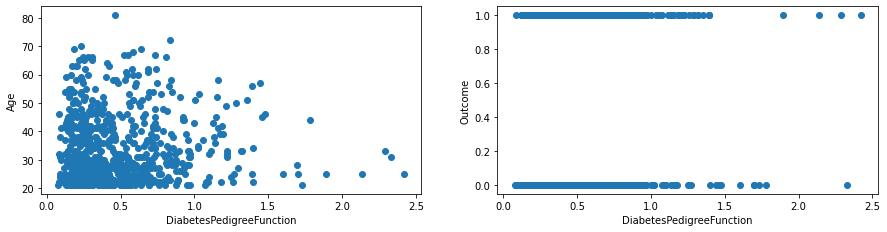

In [16]:
plt.figure(figsize=(15, 20))
j=1
for i in range(7,9):
        plt.subplot(5,2,j)
        plt.scatter(dataset.iloc[:,6],dataset.iloc[:,i])
        plt.xlabel(dataset.columns[6])
        plt.ylabel(dataset.columns[i])
        j+=1

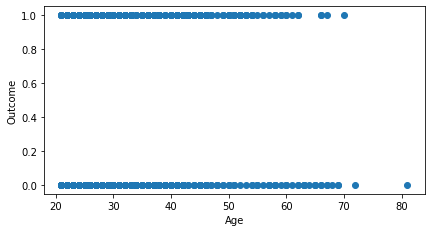

In [17]:
plt.figure(figsize=(15, 20))
j=1
for i in range(8,9):
        plt.subplot(5,2,j)
        plt.scatter(dataset.iloc[:,7],dataset.iloc[:,i])
        plt.xlabel(dataset.columns[7])
        plt.ylabel(dataset.columns[i])
        j+=1

## Checking for Clean Data

In [18]:
dataset.isnull().values.any()

False

In [19]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

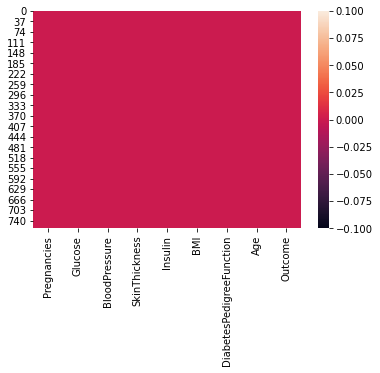

In [20]:
sns.heatmap(dataset.isnull())

## Creating Dependent and Independent variable

In [21]:
X=dataset.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [22]:
y=dataset['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Dividing into Train and Test Dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.1, random_state=0)

In [24]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
253    0
622    0
235    1
351    0
672    0
Name: Outcome, Length: 77, dtype: int64

## Model Training

In [25]:
logmodl=LogisticRegression()

In [26]:
logmodl.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
253,0,86,68,32,0,35.8,0.238,25
622,6,183,94,0,0,40.8,1.461,45
235,4,171,72,0,0,43.6,0.479,26
351,4,137,84,0,0,31.2,0.252,30


In [28]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
253    0
622    0
235    1
351    0
672    0
Name: Outcome, Length: 77, dtype: int64

## Model Evaluation

In [29]:
y_pred=logmodl.predict(X_test)

In [30]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [31]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
253,0,0
622,0,1
235,1,1
351,0,0


In [32]:
accuracy_score(y_test, y_pred)*100

87.01298701298701

In [33]:
cm=confusion_matrix(y_test, y_pred)
((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))*100

87.01298701298701

In [34]:
((48+19)/(48+3+7+19))*100

87.01298701298701

In [45]:
 classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.94      0.91        51\n           1       0.86      0.73      0.79        26\n\n    accuracy                           0.87        77\n   macro avg       0.87      0.84      0.85        77\nweighted avg       0.87      0.87      0.87        77\n'

## Model Testing

In [46]:
predict={0:'Not Diabetic',1:'Diabetic'}

In [47]:
predict

{0: 'Not Diabetic', 1: 'Diabetic'}

In [68]:
z=logmodl.predict([[2,126,60,30,1,47,31.2,24]])

In [69]:
z

array([1], dtype=int64)

In [64]:
predict[z[0]]

'Diabetic'

In [65]:
z=logmodl.predict([[4,76,62,0,0,34.0,0.391,25]])

In [66]:
z

array([0], dtype=int64)

In [67]:
predict[z[0]]

'Not Diabetic'